# 卒業研究16：期待値データのカウントを平行移動して学習データを増やす
前回のシミュレーションデータでは，教師データとの乖離があったのでうまく学習データを作成できないか工夫してみる．

問題があると思われるのは，ピークの深さと考えるので学習に際してピークの深さを考慮しないように工夫することを目標にする
## 20S1066 坂西和也

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# データの読み込み
import os
# カレントディレクトリを取得
data_path = os.getcwd()

In [3]:
data_path

'/content'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(data_path + '/drive/MyDrive/卒研/EuF3_data.csv' , sep='\t')

In [5]:
data.head()

,Velocity (mm/s),EuF3_w0T7_8S5_85,EuF3_w1T7_8S5_85,EuF3_w2T7_8S5_85,EuF3_w3T7_8S5_85
0,-20.000000,373.275017,89.683715,59.446287,38.924525
1,-19.685039,373.239700,90.317998,59.679393,38.652381
2,-19.370079,373.287540,90.972404,59.770151,38.261999
3,-19.055118,373.344075,91.617714,59.701970,37.806983
4,-18.740157,373.326817,92.212957,59.470467,37.346615


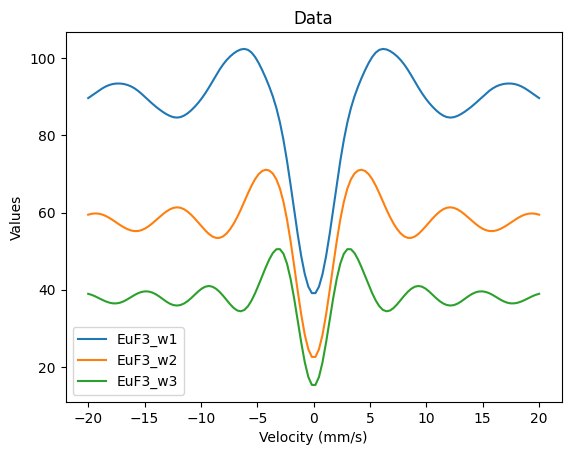

In [6]:
# 横軸に1列目のデータを使用
x = data.iloc[:, 0]

# 3列目から5列目のデータをそれぞれプロット
for i in range(2, 5):
    plt.plot(x, data.iloc[:, i], label=f'EuF3_w{i-1}')

# 凡例を追加
plt.legend()

# グラフのタイトルと軸ラベルを設定
plt.title('Data')
plt.xlabel('Velocity (mm/s)')
plt.ylabel('Values')

# グラフを表示
plt.show()

# 平行移動に対する誤差の挙動の確認

In [21]:
# 新しいデータフレーム w1_data を作成
w1_data = pd.DataFrame()

# 最初のカラム（速度）をコピー
w1_data[data.columns[0]] = data.iloc[:, 0]

# 2つ目以降のカラムを作成（3番目のカラムに対して指定された値を足す）
values_to_add = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
for value in values_to_add:
    new_column = data.iloc[:, 2] + value
    column_name = f'Column_{value}'
    w1_data[column_name] = new_column

# 新しいデータフレーム w1_data の先頭部分を表示して確認
w1_data.head()

,Velocity (mm/s),Column_500,Column_1000,Column_1500,Column_2000,Column_2500,Column_3000,Column_3500,Column_4000,Column_4500,Column_5000
0,-20.000000,589.683715,1089.683715,1589.683715,2089.683715,2589.683715,3089.683715,3589.683715,4089.683715,4589.683715,5089.683715
1,-19.685039,590.317998,1090.317998,1590.317998,2090.317998,2590.317998,3090.317998,3590.317998,4090.317998,4590.317998,5090.317998
2,-19.370079,590.972404,1090.972404,1590.972404,2090.972404,2590.972404,3090.972404,3590.972404,4090.972404,4590.972404,5090.972404
3,-19.055118,591.617714,1091.617714,1591.617714,2091.617714,2591.617714,3091.617714,3591.617714,4091.617714,4591.617714,5091.617714
4,-18.740157,592.212957,1092.212957,1592.212957,2092.212957,2592.212957,3092.212957,3592.212957,4092.212957,4592.212957,5092.212957


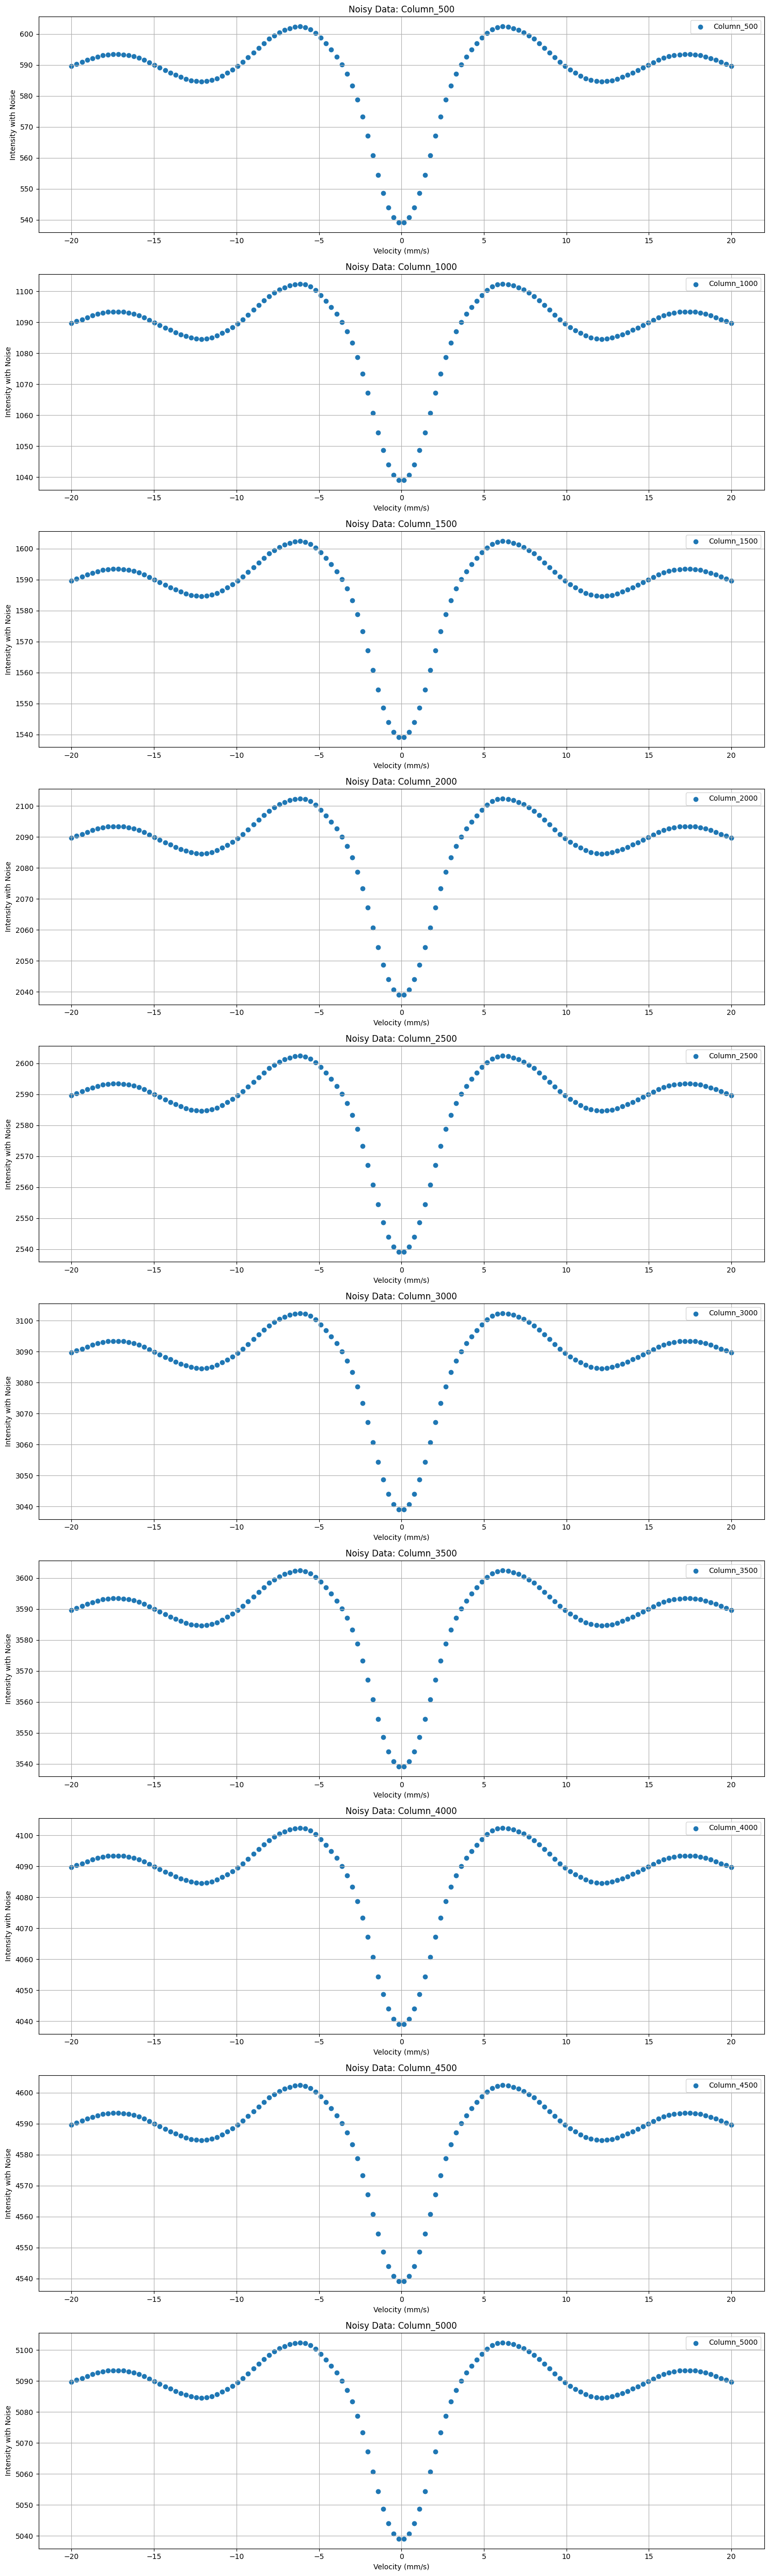

In [22]:
import matplotlib.pyplot as plt

# データフレームのプロット
num_columns = len(w1_data.columns) - 1  # 最初のカラムを除くカラム数
plt.figure(figsize=(15, 5 * num_columns))

# 最初のカラム（おそらく速度）をx軸に使用
x = w1_data.iloc[:, 0]

# 2つ目以降の各カラムを個別の点プロットとして表示
for i in range(1, num_columns + 1):
    plt.subplot(num_columns, 1, i)
    plt.scatter(x, w1_data.iloc[:, i], label=w1_data.columns[i])
    plt.xlabel('Velocity (mm/s)')
    plt.ylabel('Intensity with Noise')
    plt.title(f'Noisy Data: {w1_data.columns[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [18]:
# 乱数生成のためのシードを設定
np.random.seed(111)

w1_data_noisy = w1_data.copy()

# 2つ目以降の各カラムにノイズを加える
for column in w1_data.columns[1:]:
    # 各データポイントの値を分散とする正規分布からノイズを生成
    variance = w1_data[column].values
    noise = np.random.normal(0, np.sqrt(variance))
    w1_data_noisy[column] = w1_data[column] + noise

# ノイズを加えたデータフレームの先頭部分を表示して確認
w1_data_noisy.head()

,Velocity (mm/s),Column_500,Column_1000,Column_1500,Column_2000,Column_2500,Column_3000,Column_3500,Column_4000,Column_4500,Column_5000
0,-20.000000,618.538475,1128.460772,1542.058165,2184.210095,2418.621192,3070.038787,3929.847034,4022.162560,4840.911823,4875.442475
1,-19.685039,628.897624,1143.864645,1445.929969,1784.370255,2354.842249,3305.041182,3556.286113,3708.334764,4569.906714,5161.140894
2,-19.370079,715.799525,967.631816,1460.497065,1825.605564,2495.135528,3286.837821,3451.234708,4359.911102,4434.802919,5162.475306
3,-19.055118,684.301471,1170.380574,1771.991539,2046.890764,2663.546344,3082.719761,3515.039664,4098.606488,4363.841005,5245.018961
4,-18.740157,643.914682,1098.845589,1468.563173,2342.195143,2732.673902,3126.603824,3660.942166,3858.198834,4587.720405,5317.147629


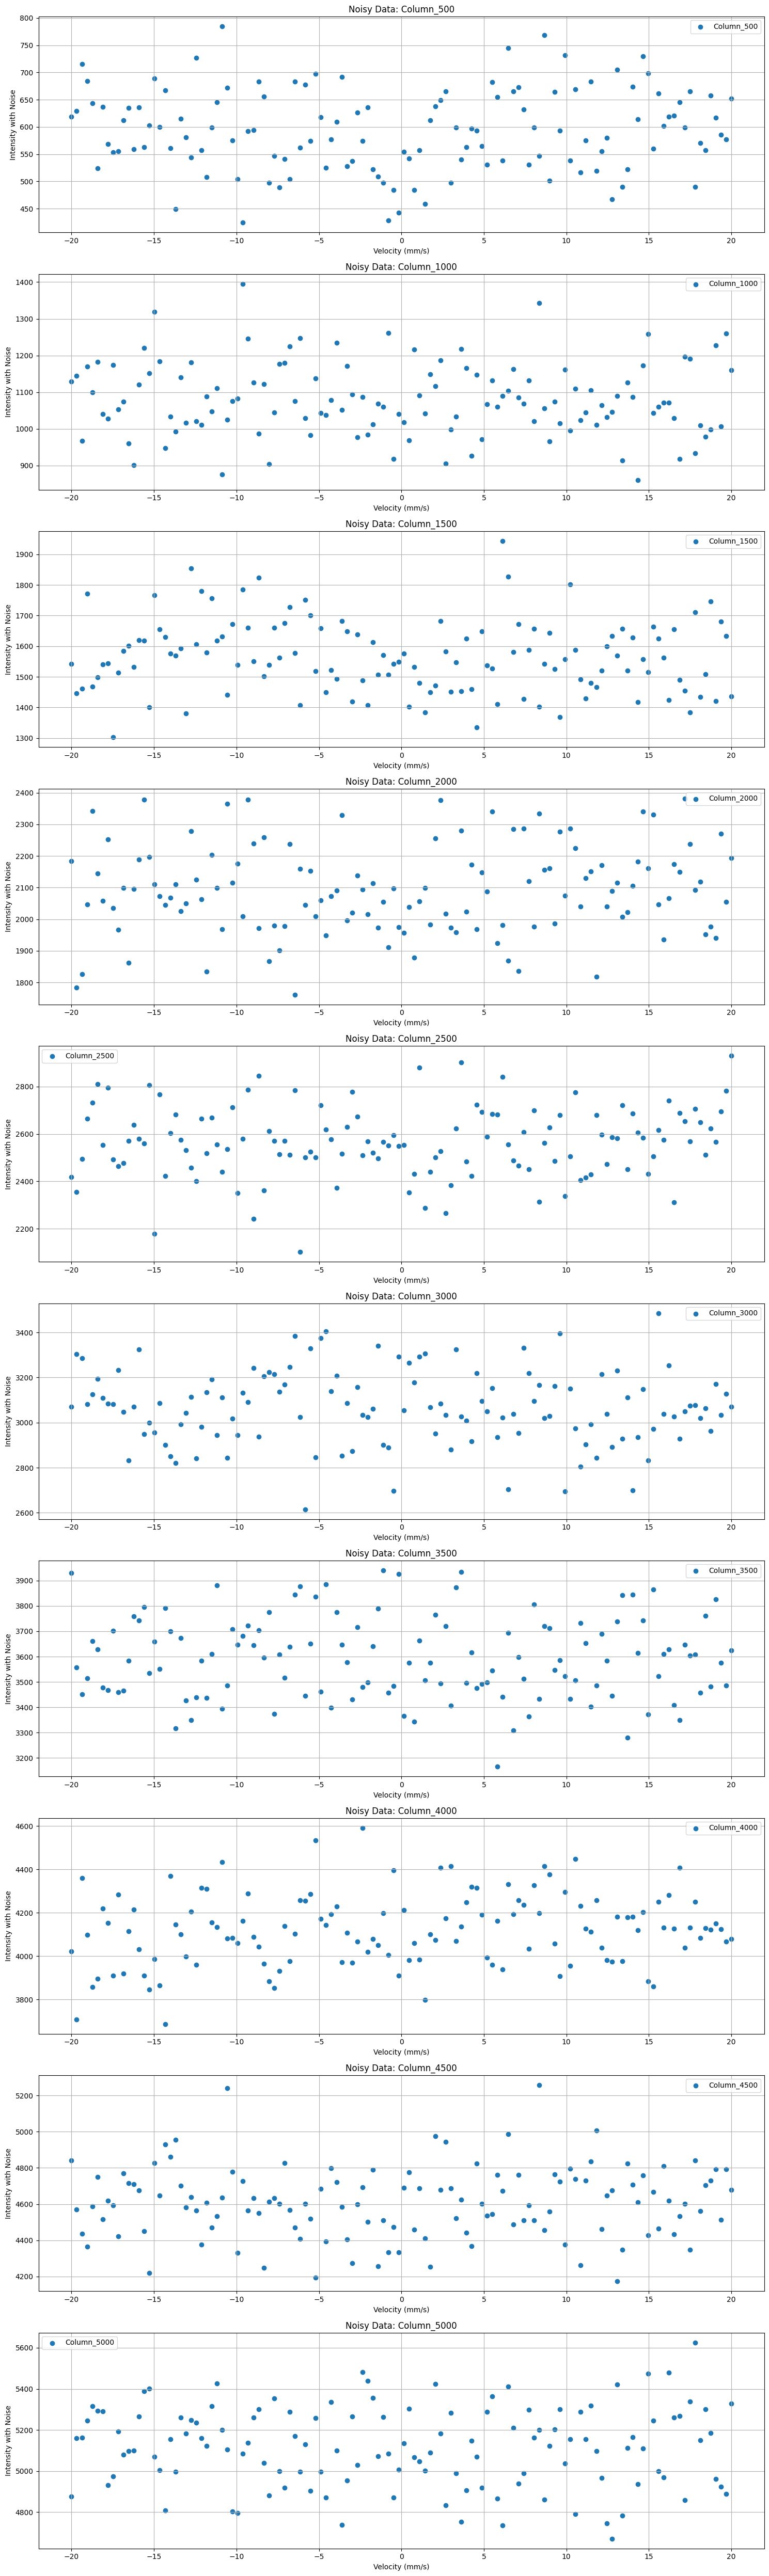

In [19]:
import matplotlib.pyplot as plt

# データフレームのプロット
num_columns = len(w1_data_noisy.columns) - 1  # 最初のカラムを除くカラム数
plt.figure(figsize=(15, 5 * num_columns))

# 最初のカラム（おそらく速度）をx軸に使用
x = w1_data_noisy.iloc[:, 0]

# 2つ目以降の各カラムを個別の点プロットとして表示
for i in range(1, num_columns + 1):
    plt.subplot(num_columns, 1, i)
    plt.scatter(x, w1_data_noisy.iloc[:, i], label=w1_data_noisy.columns[i])
    plt.xlabel('Velocity (mm/s)')
    plt.ylabel('Intensity with Noise')
    plt.title(f'Noisy Data: {w1_data_noisy.columns[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()